In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
df = pd.read_csv("ML_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Lead Machine Learning Engineer,70000,EUR,77777,FI,50,FI,L
1,2024,EN,FT,ML Engineer,27000,USD,27000,TR,0,TR,S
2,2024,MI,FT,Data Scientist,114000,CHF,129545,CH,50,CH,L
3,2024,EN,FT,Machine Learning Research Engineer,105000,CAD,80769,CA,50,CA,M
4,2024,SE,FT,Business Intelligence Engineer,108500,USD,108500,US,100,US,M


<Axes: >

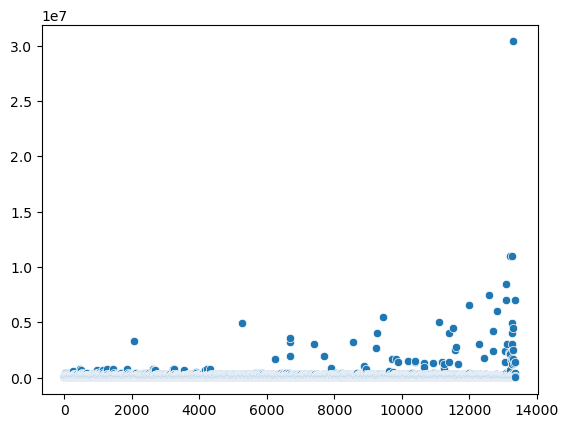

In [33]:
sns.scatterplot(list(df["salary"]))

In [34]:
list(df["country_location"])

KeyError: 'country_location'

In [ ]:
len(list(df["salary"]))

In [35]:
len([item for item in list(df["salary"]) if str(item)[-1:] not in ("0", "5")])

461

In [36]:
len([item for item in list(df["salary"]) if str(item)[-2:] != "00"])

1433

In [37]:
df["company_location"].value_counts()

company_location
US    11670
GB      586
CA      341
ES      125
DE       93
      ...  
AD        1
QA        1
MU        1
OM        1
MD        1
Name: count, Length: 77, dtype: int64

In [38]:
british_df = df[df["company_location"] == "GB"]
british_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,586.000000,586.000000,586.000000,586.000000
mean,2022.933447,84737.281570,97670.783276,31.655290
std,0.687376,56180.305987,58685.094440,45.484934
min,2020.000000,23000.000000,28299.000000,0.000000
25%,2023.000000,47286.250000,58444.000000,0.000000
50%,2023.000000,65502.000000,81250.000000,0.000000
75%,2023.000000,100000.000000,116416.000000,100.000000
max,2024.000000,350000.000000,430967.000000,100.000000


In [39]:
british_df["salary_currency"].value_counts()

salary_currency
GBP    469
USD    111
EUR      6
Name: count, dtype: int64

In [42]:
british_df["salary_in_gbp"] = british_df["salary_in_usd"]*1.27**-1
british_df["salary_in_gbp"] = np.where(british_df["salary_currency"] == "GBP", british_df["salary"], british_df["salary_in_gbp"])
british_df.head()

/tmp/ipykernel_33121/4221428117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  british_df["salary_in_gbp"] = british_df["salary_in_usd"]*1.27**-1
/tmp/ipykernel_33121/4221428117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  british_df["salary_in_gbp"] = np.where(british_df["salary_currency"] == "GBP", british_df["salary"], british_df["salary_in_gbp"])


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_gbp
75,2024,SE,FT,Data Product Manager,220000,USD,220000,GB,0,GB,M,173228.346457
76,2024,SE,FT,Data Product Manager,137500,USD,137500,GB,0,GB,M,108267.716535
270,2024,SE,FT,Data Scientist,65000,GBP,81250,GB,0,GB,M,65000.000000
271,2024,SE,FT,Data Scientist,55000,GBP,68750,GB,0,GB,M,55000.000000
376,2024,SE,FT,Data Scientist,60000,GBP,75000,GB,0,GB,M,60000.000000


In [44]:
british_df.describe()

,work_year,salary,salary_in_usd,remote_ratio,salary_in_gbp
count,586.000000,586.000000,586.000000,586.000000,586.000000
mean,2022.933447,84737.281570,97670.783276,31.655290,78284.286152
std,0.687376,56180.305987,58685.094440,45.484934,46745.502468
min,2020.000000,23000.000000,28299.000000,0.000000,23000.000000
25%,2023.000000,47286.250000,58444.000000,0.000000,47053.750000
50%,2023.000000,65502.000000,81250.000000,0.000000,65000.000000
75%,2023.000000,100000.000000,116416.000000,100.000000,91500.000000
max,2024.000000,350000.000000,430967.000000,100.000000,350000.000000


<Axes: xlabel='remote_ratio', ylabel='salary_in_gbp'>

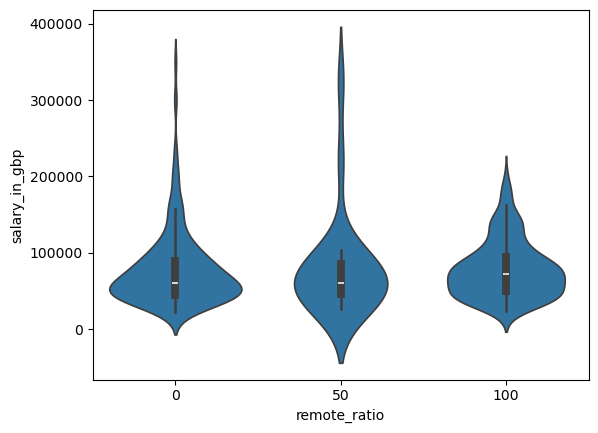

In [52]:
sns.violinplot(y=british_df["salary_in_gbp"], x=british_df["remote_ratio"])

<Axes: xlabel='experience_level', ylabel='salary_in_gbp'>

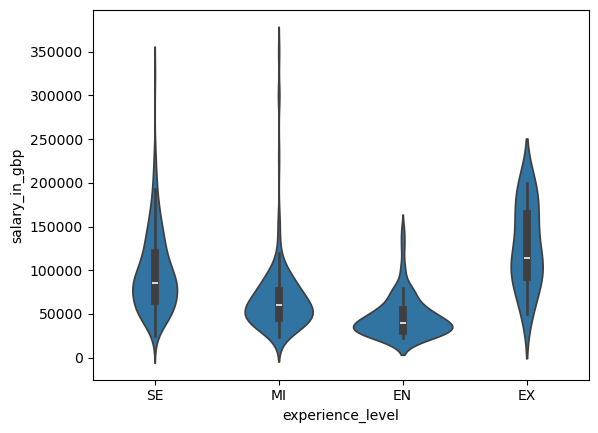

In [53]:
sns.violinplot(y=british_df["salary_in_gbp"], x=british_df["experience_level"])

<Axes: xlabel='company_size', ylabel='salary_in_gbp'>

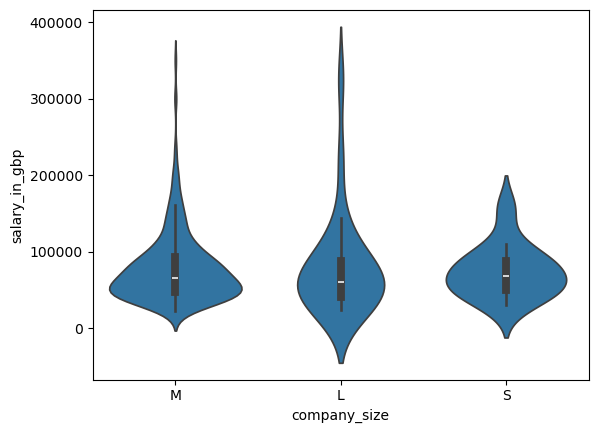

In [54]:
sns.violinplot(y=british_df["salary_in_gbp"], x=british_df["company_size"])

(73, 12)


<Axes: xlabel='work_year', ylabel='salary_in_gbp'>

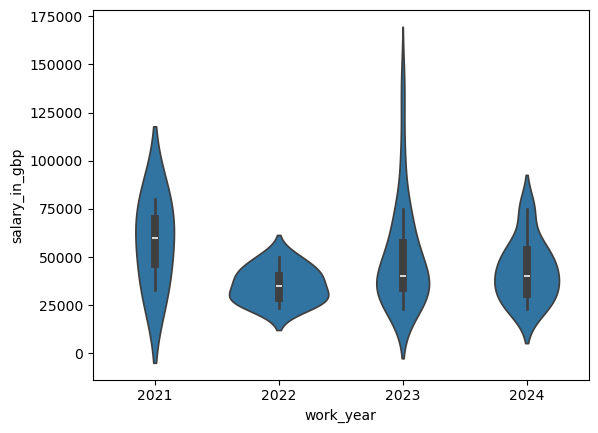

In [65]:
entry_british_df = british_df[british_df["experience_level"] == "EN"]
print(entry_british_df.shape)
sns.violinplot(y=entry_british_df["salary_in_gbp"], x=entry_british_df["work_year"])

In [56]:
british_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'salary_in_gbp'],
      dtype='object')

In [67]:
british_df["employee_residence"].value_counts()

employee_residence
GB    578
FR      2
IT      1
ES      1
VN      1
PL      1
HK      1
RO      1
Name: count, dtype: int64

In [69]:
british_df["remote_ratio"].value_counts()

remote_ratio
0      389
100    174
50      23
Name: count, dtype: int64

In [77]:
X = british_df[["experience_level", "job_title", "remote_ratio", "company_size"]]
y = british_df["salary_in_gbp"]

In [80]:
british_df["job_title"].value_counts()

job_title
Data Engineer                               145
Data Analyst                                119
Data Scientist                               98
Machine Learning Engineer                    40
Analytics Engineer                           28
Data Architect                               14
Business Intelligence Analyst                 9
BI Developer                                  8
Insight Analyst                               8
Research Engineer                             7
Data Manager                                  6
Machine Learning Scientist                    6
Business Intelligence Engineer                6
Head of Data                                  6
Director of Data Science                      4
Machine Learning Infrastructure Engineer      4
Research Scientist                            4
Data Science Consultant                       4
Computer Vision Engineer                      4
Data Product Owner                            4
AI Engineer                   

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Assuming X_categorical and y are your dataset

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self, num_categories, embedding_dim, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.embedding = nn.ModuleList([nn.Embedding(num_cat, embedding_dim) for num_cat in num_categories])
        self.fc1 = nn.Linear(len(num_categories) * embedding_dim, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x_categorical):
        embedded = [emb(x_cat) for emb, x_cat in zip(self.embedding, x_categorical)]
        embedded = [torch.flatten(emb, start_dim=1) for emb in embedded]
        x = torch.cat(embedded, dim=1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Determine the number of unique categories for each categorical feature
num_categories = [len(set(X_train[:, i])) for i in range(X_train.shape[1])]

# Instantiate the model
embedding_dim = 10
hidden_size = 64
model = NeuralNetwork(num_categories, embedding_dim, hidden_size)

# Define Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        batch_X_categorical = [X_train[i:i+batch_size, j].unsqueeze(1) for j in range(X_train.shape[1])]
        batch_y = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(batch_X_categorical)
        loss = criterion(outputs, batch_y.unsqueeze(1))  # Ensure y has the right shape
        loss.backward()
        optimizer.step()
        
    # Validation
    model.eval()
    with torch.no_grad():
        val_X_categorical = [X_test[:, j].unsqueeze(1) for j in range(X_test.shape[1])]
        val_outputs = model(val_X_categorical)
        val_loss = criterion(val_outputs, y_test.unsqueeze(1))  # Ensure y has the right shape
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

# Testing (Evaluate your model on the testing dataset)
model.eval()
with torch.no_grad():
    test_X_categorical = [X_test[:, j].unsqueeze(1) for j in range(X_test.shape[1])]
    test_outputs = model(test_X_categorical)
    test_loss = criterion(test_outputs, y_test.unsqueeze(1))  # Ensure y has the right shape

print(f"Testing Loss: {test_loss.item()}")


InvalidIndexError: (slice(None, None, None), 0)